![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **MOMENTUM TRADING MODEL**

## **How to build a momentum model or trend following system using python code**

<font size="3"> In this post we are showing how to build a momentum model in python. Momentum models are also known as trend following systems, and are models that allow us to go in the direction of the trend. In this post we are showing a momentum model known as Alexander's filter, which was proposed by the MIT professor Sidney Alexander in the 1960s. 
<br><br>
    
<font size="3">The basic or single filter described by Alexander was as following: Start with a position that is either long or short. If the position is long, and the market falls by X% from its previous high, reverse and go short. If today’s price is above the previous high, set tomorrows previous high equal to today’s price. On the other hand, if the position is short, and the market rises by X% from its previous low, reverse and go long. If today’s price is below the previous low, set tomorrow’s previous low equal to today’s price. As you can see the model is indeed very simple. With this rule you will be always with a position in the market, either long or short. Many persons can see this as a weakness of the model since a trading strategy might be market neutral during some periods. Despite this shortcoming, Alexander’s filter manages to beat a long only strategy in multiple situations. Of course, you can always adjust this kind of models to be out of the market during certain periods of time.   

In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

## **Import the data**

<font size="3"> We can use this <a href="https://github.com/dhonn/schwab-python-api/" target="_blank">csv file</a> that contains the prices for the S&P500 to run the example. Alternatively, you can download the data from the Yahoo Finance API. If you would like to know how to do that, please check the following <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">blog post</a>. If you would like to know how to download data from public APIs such as this from Yahoo Finance, or others like SEC EDGAR, FINRA, OECD among others, we recommend you to look at our course <a href="https://quant-trading.co/cursos/data-science-for-trading/" target="_blank">"Data Science for Investing and Trading".</a> 
<br><br>

In [2]:
#IMPORT EQUITY PRICES
df = pd.read_csv('SPX.csv',encoding='UTF-8')   #IN THIS EXAMPLE WE USE SPX

In [3]:
#DATAFRAME FOR VISUAL INSPECTION
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,0,0
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,0,0
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,0,0
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,0,0
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,0,0
...,...,...,...,...,...,...,...,...
8179,2022-06-17,3665.899902,3707.709961,3636.870117,3674.840088,6954110000,0,0
8180,2022-06-21,3715.310059,3779.649902,3715.310059,3764.790039,4124600000,0,0
8181,2022-06-22,3733.889893,3801.790039,3717.689941,3759.889893,4342270000,0,0
8182,2022-06-23,3774.709961,3802.580078,3743.520020,3795.729980,4078100000,0,0


## **Calculate the signal for the momentum trading model**

<font size="3">We are building a signal that indicates if we are going long or short the market. If we are going long, then we assign the number 1. Otherwise, we assign the number -1. We chose to start with a long position. We also need to keep track of the running high or running low in our data. For this purpose, we define the variables new high and new low.  We also need to define the percentage that will indicate if we are reversing our position from long to short or vice versa. We are calling this quantity “the stop”.  Here we arbitrarily chose to define the stop at 12.2%. Recall how the algorithm works: If the position is long, and the market falls by 12.2% from its previous high, reverse and go short. Do similarly if the position is short. 
The following for loop, helps us navigate the data frame and update our variables sequentially. You must be aware that using this kind of for loops in a python data frame can be very slow. However, we wanted to write the code this way because it is easier to follow.

In [4]:
#CALCULATIONS USING FOR LOOPS - EASIER TO CODE BUT TAKES A LONG TIME TO PROCESS
stop = 0.1220
df['new_high'] = np.nan
df['new_low'] = np.nan
df['signal'] = np.nan
df['new_high'].iloc[0] = df['Close'].iloc[0]
df['new_low'].iloc[0] = df['Close'].iloc[0]
df['signal'].iloc[0] = 1.0


for i in range(1,df.shape[0]):
    #COMPUTE SIGNAL
    if df['signal'].iloc[i-1] == 1.0:
        if df['Close'].iloc[i] < df['new_high'].iloc[i-1]*(1-stop):
            df['signal'].iloc[i] = -1.0
        else:
            df['signal'].iloc[i] = 1.0
    else:
        if df['Close'].iloc[i] > df['new_low'].iloc[i-1]*(1+stop):
            df['signal'].iloc[i] = 1.0
        else:
            df['signal'].iloc[i] = -1.0
    
    #COMPUTE NEW HIGH
    if df['signal'].iloc[i] != df['signal'].iloc[i-1]:
        df['new_high'].iloc[i] = df['Close'].iloc[i]
    else:
        if df['signal'].iloc[i] == 1.0:
            df['new_high'].iloc[i] = np.maximum(df['new_high'].iloc[i-1],df['Close'].iloc[i])
        else:
            df['new_high'].iloc[i] = df['new_high'].iloc[i-1]
            
    #COMPUTE NEW LOW
    if df['signal'].iloc[i] != df['signal'].iloc[i-1]:
        df['new_low'].iloc[i] = df['Close'].iloc[i]
    else:
        if df['signal'].iloc[i] == -1.0:
            df['new_low'].iloc[i] = np.minimum(df['new_low'].iloc[i-1],df['Close'].iloc[i])
        else:
            df['new_low'].iloc[i] = df['new_low'].iloc[i-1]

In [5]:
#DATAFRAME FOR VISUAL INSPECTION
df.tail(40)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,new_high,new_low,signal
8144,2022-04-28,4222.580078,4308.450195,4188.629883,4287.500000,3969440000,0,0,4201.089844,4170.700195,-1.0
8145,2022-04-29,4253.750000,4269.680176,4124.279785,4131.930176,3943480000,0,0,4201.089844,4131.930176,-1.0
8146,2022-05-02,4130.609863,4169.810059,4062.510010,4155.379883,4474060000,0,0,4201.089844,4131.930176,-1.0
8147,2022-05-03,4159.779785,4200.100098,4147.080078,4175.479980,3877530000,0,0,4201.089844,4131.930176,-1.0
8148,2022-05-04,4181.180176,4307.660156,4148.910156,4300.169922,4236210000,0,0,4201.089844,4131.930176,-1.0
8149,2022-05-05,4270.430176,4270.430176,4106.009766,4146.870117,4197620000,0,0,4201.089844,4131.930176,-1.0
8150,2022-05-06,4128.169922,4157.689941,4067.909912,4123.339844,4254300000,0,0,4201.089844,4123.339844,-1.0
8151,2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,4746120000,0,0,4201.089844,3991.239990,-1.0
8152,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,0,0,4201.089844,3991.239990,-1.0
8153,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,0,0,4201.089844,3935.179932,-1.0


## **Plot the results**

<font size="3">Now we are showing the evolution of the signal and the S&P500 level for the first 200 observations. If you would like to know how to plot charts like these and even much more powerful and sofisticated, we recommend you to look at our course <a href="https://quant-trading.co/cursos/data-science-for-trading/" target="_blank">"Data Science for Investing and Trading".</a> 
<br><br>

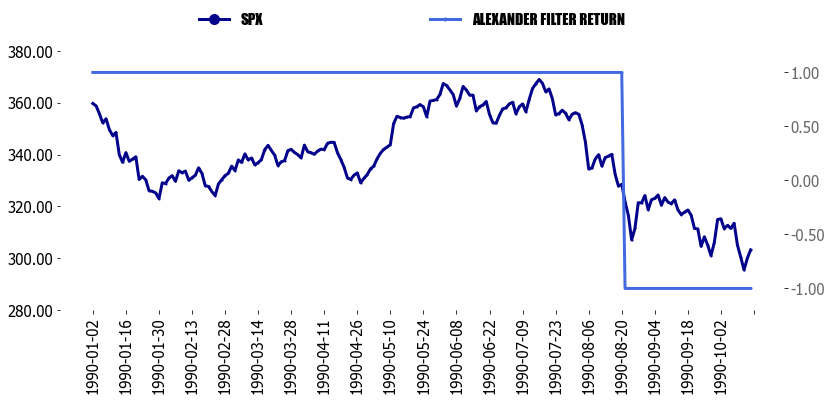

In [28]:
#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 10

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['Date'].head(200),df['Close'].head(200),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, 280, 380])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(df['Date'].head(200),df['signal'].head(200),marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.8, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15, color='dimgrey')
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, -1.2, 1.2])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

## **Use the apply function to do the loop faster**

<font size="3">We can also write this script in a slightly different way. We can use the apply method on the data frame, which works much faster. Look that here we just define the loop as a function that named calculations.  We storage the output in a new data frame called results. This way we easily get the signal and can put it in the data frame with the other information. 
<br><br>

In [6]:
#CALCULATIONS USING LAMBDA FUNCTION - MUCH FASTER
stop = 0.1220

NEW_HIGH = df['Close'].iloc[0]
NEW_LOW = df['Close'].iloc[0]
PREVIOUS_SIGNAL = 1.0
SIGNAL = PREVIOUS_SIGNAL

def calculations(SIGNAL,CLOSE):
    global NEW_HIGH
    global NEW_LOW
    global PREVIOUS_SIGNAL
    
    #COMPUTE SIGNAL, NEW_HIGH, NEW_LOW
    if PREVIOUS_SIGNAL == 1.0:
        if CLOSE < NEW_HIGH*(1-stop):            
            SIGNAL = -1.0            
            PREVIOUS_SIGNAL = 1.0
        else:            
            SIGNAL = 1.0
            PREVIOUS_SIGNAL = 1.0
    else:
        if CLOSE > NEW_LOW*(1+stop):            
            SIGNAL = 1.0
            PREVIOUS_SIGNAL = -1.0
        else:            
            SIGNAL = -1.0 
            PREVIOUS_SIGNAL = -1.0
            
    if SIGNAL!= PREVIOUS_SIGNAL:
        NEW_HIGH = CLOSE
        NEW_LOW = CLOSE
        PREVIOUS_SIGNAL = -1.0*PREVIOUS_SIGNAL
    else:
        if SIGNAL == 1.0:
            NEW_HIGH = np.maximum(NEW_HIGH,CLOSE)            
        else:
            NEW_LOW = np.minimum(NEW_LOW,CLOSE)           
            
    
    return SIGNAL, NEW_HIGH, NEW_LOW
            
                
results = df.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)

## **Put the signals in the DataFrame and calculate the trading returns**

<font size="3">Finally, we calculate the daily market returns and the daily signal returns. Market returns are simply the actual closing price divided by the previous closing price minus 1. This is basically the very well-known return formula. The signal returns are the same but multiplied by the signal. Recall that the signal is either 1 or -1. Look that we don’t only calculate daily returns, but cumulative ones. This can be easily done using the function cumprod in python.
<br><br>

In [7]:
#DATAFRAME FOR VISUAL INSPECTION
df['signal'] = [x[0] for x in results]
df['new_high'] = [x[1] for x in results]
df['new_low'] = [x[2] for x in results]

df.tail(40)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,new_high,new_low,signal
8144,2022-04-28,4222.580078,4308.450195,4188.629883,4287.500000,3969440000,0,0,4201.089844,4170.700195,-1.0
8145,2022-04-29,4253.750000,4269.680176,4124.279785,4131.930176,3943480000,0,0,4201.089844,4131.930176,-1.0
8146,2022-05-02,4130.609863,4169.810059,4062.510010,4155.379883,4474060000,0,0,4201.089844,4131.930176,-1.0
8147,2022-05-03,4159.779785,4200.100098,4147.080078,4175.479980,3877530000,0,0,4201.089844,4131.930176,-1.0
8148,2022-05-04,4181.180176,4307.660156,4148.910156,4300.169922,4236210000,0,0,4201.089844,4131.930176,-1.0
8149,2022-05-05,4270.430176,4270.430176,4106.009766,4146.870117,4197620000,0,0,4201.089844,4131.930176,-1.0
8150,2022-05-06,4128.169922,4157.689941,4067.909912,4123.339844,4254300000,0,0,4201.089844,4123.339844,-1.0
8151,2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,4746120000,0,0,4201.089844,3991.239990,-1.0
8152,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,0,0,4201.089844,3991.239990,-1.0
8153,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,0,0,4201.089844,3935.179932,-1.0


In [8]:
#CALCULATE DAILY RETURNS
df['daily_return_mkt'] = df['Close'][1:].values/ df['Close'][:-1]-1
df['daily_return_mkt'] = df['daily_return_mkt'].shift(-1)
df['daily_return_signal'] = df['daily_return_mkt']*df['signal']

df['cumulative_return_mkt']=(1 + df['daily_return_mkt']).cumprod() - 1
df['cumulative_return_mkt'][1:]=df['cumulative_return_mkt'][:-1]
df['cumulative_return_signal']=(1 + df['daily_return_signal']).cumprod() - 1
df['cumulative_return_signal'][1:]=df['cumulative_return_signal'][:-1]

## **Plot the results of the momentum trading model**

<font size="3">The results are shown in the following chart. Here we use all the data from 1990 to 2022. As you can see, Alexander’s filter returns are way higher than a long only strategy for S&P500. You need to know that the success of the strategy is highly dependent on the stop level that we choose. So, ¿how can we choose that number? Before we discuss some optimization techniques, one simple approach is to try different numbers and see which one delivers the best results. 
<br><br>

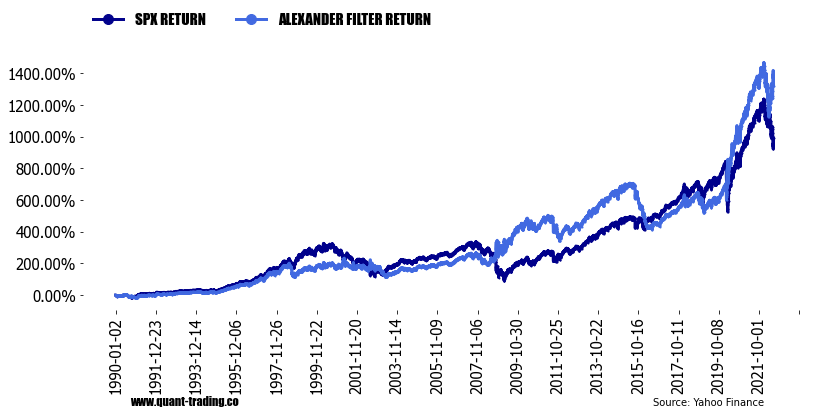

In [9]:
#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['Date'],df['cumulative_return_mkt']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX RETURN',markersize=1)
ax1.plot(df['Date'],df['cumulative_return_signal']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1500], -700,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df['Date'].iloc[-8000], -700,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

## **In sample and out of the sample DataFrame and different stop loss rules**

<font size="3">In the following script we are splitting our data frame in 2 sets. We are calling the first set the “In sample data frame”. The second set will be known as the “Out of the sample data frame”. The “In sample data frame” contains the first 7501 observations, whereas the “out of the sample data frame” contains only 684 observations.  In the first set we can try different stop numbers and see which one performs best. We tried 6 different numbers starting at 2.5% up to 15% with 2.5% increments. Then, we plot the results to get a visual inspection. The signal labeled as number 4 performs the best in the “In sample data frame”. This signal is associated with a 10% stop loss rule. This is lower than the 12.2% number that we arbitrarily chose for the whole data set.  
<br><br>

In [10]:
# IN SAMPLE DATAFRAME

df_is = df.iloc[0:7500]
df_is['daily_return_mkt'] = df_is['Close'][1:].values/ df_is['Close'][:-1]-1
df_is['daily_return_mkt'] = df_is['daily_return_mkt'].shift(-1)
df_is['cumulative_return_mkt']=(1 + df_is['daily_return_mkt']).cumprod() - 1
df_is['cumulative_return_mkt'][1:]=df_is['cumulative_return_mkt'][:-1]    

stop_loss = [0.025,0.05,0.075,0.1,0.125,0.15]
i = 0

for stop in stop_loss:    
    results = df_is.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
    df_is['signal'+ str(i)] = [x[0] for x in results]
    df_is['daily_return_signal'+ str(i)] = df_is['daily_return_mkt']*df_is['signal'+ str(i)]
    df_is['cumulative_return_signal'+ str(i)]=(1 + df_is['daily_return_signal'+ str(i)]).cumprod() - 1
    df_is['cumulative_return_signal'+ str(i)][1:]=df_is['cumulative_return_signal'+ str(i)][:-1]
    i = i + 1

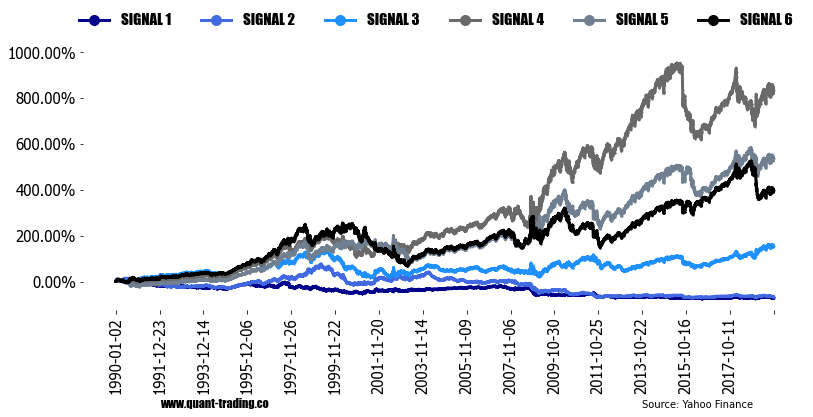

In [11]:
#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal0']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SIGNAL 1',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal1']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='SIGNAL 2',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal2']*100,marker='o', linestyle='solid',linewidth=3,color='dodgerblue',alpha=0.99,label='SIGNAL 3',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal3']*100,marker='o', linestyle='solid',linewidth=3,color='dimgrey',alpha=0.99,label='SIGNAL 4',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal4']*100,marker='o', linestyle='solid',linewidth=3,color='slategrey',alpha=0.99,label='SIGNAL 5',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal5']*100,marker='o', linestyle='solid',linewidth=3,color='black',alpha=0.99,label='SIGNAL 6',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df_is['Date'].iloc[-1500], -550,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df_is['Date'].iloc[-7000], -550,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

## **Out of sample performance**

<font size="3"> ¿How does this rule perform in the “Out of the sample data frame”? We just need to run the script to see how it does. Again, in this case, Alexander’s filter outperforms the long only strategy for the S&P500. Despite being a very simple strategy, this trading model can get you returns higher than the market returns for one of the most efficient markets in the world.  If you wnat to learn toher momentum or mean reversion trading models, please look at our course on <a href="https://quant-trading.co/cursos/trading-algoritmico-2/" target="_blank">Algorithmic Trading.</a>.  
<br><br>

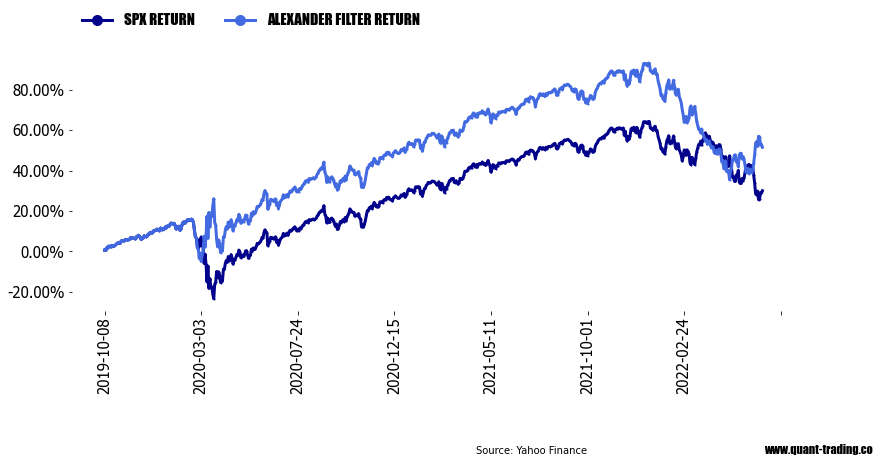

In [12]:
#OUT OF SAMPLE DATAFRAME
df_os = df.iloc[7500:8183]
stop = 0.10

NEW_HIGH = df_os['Close'].iloc[0]
NEW_LOW = df_os['Close'].iloc[0]
PREVIOUS_SIGNAL = 1.0
SIGNAL = PREVIOUS_SIGNAL

results = df_os.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
df_os['signal'] = [x[0] for x in results]


df_os['daily_return_mkt'] = df_os['Close'][1:].values/ df_os['Close'][:-1]-1
df_os['daily_return_mkt'] = df_os['daily_return_mkt'].shift(-1)
df_os['daily_return_signal'] = df_os['daily_return_mkt']*df_os['signal']
df_os['cumulative_return_mkt']=(1 + df_os['daily_return_mkt']).cumprod() - 1
df_os['cumulative_return_mkt'][1:]=df_os['cumulative_return_mkt'][:-1]
df_os['cumulative_return_signal']=(1 + df_os['daily_return_signal']).cumprod() - 1
df_os['cumulative_return_signal'][1:]=df_os['cumulative_return_signal'][:-1]

#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 100

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_os['Date'],df_os['cumulative_return_mkt']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX RETURN',markersize=1)
ax1.plot(df_os['Date'],df_os['cumulative_return_signal']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-300], -100,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df['Date'].iloc[-1100], -100,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

<font size="3"> If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)